In [1]:
import pandas as pd
import os
from nba_api.stats.endpoints import playerindex, playbyplayv3
import utils.data_utils as du
import importlib


In [2]:
HOME_DIR = '/Users/yoav/Documents/Yoav/CS/20936 - DS Project/Shotpred'
DATA_DIR = os.path.join(HOME_DIR, 'data')
EXT_DATA_DIR = os.path.join(DATA_DIR, 'External')
INT_DATA_DIR = os.path.join(DATA_DIR, 'Internal')

In [3]:
KAGGLE_SHOT_LOGS_201415_FILENAME = 'kaggle_shot_logs_2014_15.csv'
KAGGLE_SHOT_LOGS_201415_FULLPATH = os.path.join(EXT_DATA_DIR, KAGGLE_SHOT_LOGS_201415_FILENAME)

GENERAL_SHOT_LOGS_FILENAME = 'nba_2015_shots.csv'
GENERAL_SHOT_LOGS_FULLPATH = os.path.join(EXT_DATA_DIR, GENERAL_SHOT_LOGS_FILENAME)

In [156]:
KAGGLE_COLS_FOR_MERGE = ['GAME_ID', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'player_id', 'absolute_game_time']
CAREER_STATS_COL_FOR_MERGE = [['PLAYER_ID', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT']] #already filtered for relevant season

In [5]:
shot_logs_1415 = pd.read_csv(KAGGLE_SHOT_LOGS_201415_FULLPATH)

In [6]:
active_players_201415_ids = shot_logs_1415['player_id'].unique()

In [157]:
shot_logs_1415['absolute_game_time'] = shot_logs_1415.apply(lambda row: du.clock_to_absolute_seconds(row['GAME_CLOCK'], row['PERIOD']), axis=1)

In [8]:
#active_players_career_stats = du.gather_mul_career_stats(active_players_201415_ids) # get the career stats for all active players in 2014-15 season

In [9]:
#active_players_cs_in_1415 = active_players_career_stats[active_players_career_stats['SEASON_ID'] == '2014-15'].reset_index(drop=True)
#active_players_cs_in_1415.to_csv(INT_DATA_DIR + 'active_players_career_stats_2014_15.csv', index=False)

In [10]:
active_players_cs_in_1415 = pd.read_csv(os.path.join(INT_DATA_DIR, 'active_players_career_stats_2014_15.csv'))

In [11]:
gen_sl = pd.read_csv(GENERAL_SHOT_LOGS_FULLPATH)

In [12]:
gen_sl.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2015,2014-15,1610612743,Denver Nuggets,203115,Will Barton,G,SG,04-15-2015,21401229,...,Restricted Area,Center,C,Less Than 8 ft.,-0.4,6.75,1,4,0,18
1,2015,2014-15,1610612744,Golden State Warriors,203949,James Michael McAdoo,F,PF,04-15-2015,21401229,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,5.35,0,4,0,22
2,2015,2014-15,1610612739,Cleveland Cavaliers,1890,Shawn Marion,F,SF,04-15-2015,21401225,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,5.35,0,5,0,3
3,2015,2014-15,1610612744,Golden State Warriors,203949,James Michael McAdoo,F,PF,04-15-2015,21401229,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,5.35,0,4,0,37
4,2015,2014-15,1610612743,Denver Nuggets,203475,Erick Green,G,PG,04-15-2015,21401229,...,Mid-Range,Left Side,L,16-24 ft.,16.9,14.85,19,4,0,48


In [158]:
gen_sl['absolute_game_time'] = gen_sl.apply(lambda row: du.clock_to_absolute_seconds(f"{str(row["MINS_LEFT"]).zfill(2)}:{str(row["SECS_LEFT"]).zfill(2)}", row['QUARTER']), axis=1)

In [161]:
kaggle_for_join = shot_logs_1415[KAGGLE_COLS_FOR_MERGE]

In [17]:
gen_sl_game_ids = set(gen_sl['GAME_ID'].unique())
kaggle_for_join_game_ids = set(kaggle_for_join['GAME_ID'].unique())

common_game_ids = gen_sl_game_ids.intersection(kaggle_for_join_game_ids)

print(f"Number of unique GAME_IDs in gen_sl: {len(gen_sl_game_ids)}")
print(f"Number of unique GAME_IDs in kaggle_for_join: {len(kaggle_for_join_game_ids)}")
print(f"Number of common GAME_IDs in both: {len(common_game_ids)}")

Number of unique GAME_IDs in gen_sl: 1230
Number of unique GAME_IDs in kaggle_for_join: 904
Number of common GAME_IDs in both: 904


In [ ]:
kg = kaggle_for_join.sort_values(by='ABS_TIME').reset_index(drop=True)

In [162]:
kaggle_for_join

,GAME_ID,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,player_id,absolute_game_time
0,21400899,10.8,2,1.9,"Anderson, Alan",101187,1.3,203148,651.0
1,21400899,3.4,0,0.8,"Bogdanovic, Bojan",202711,6.1,203148,706.0
2,21400899,NaN,3,2.7,"Bogdanovic, Bojan",202711,0.9,203148,720.0
3,21400899,10.3,2,1.9,"Brown, Markel",203900,3.4,203148,733.0
4,21400899,10.9,2,2.7,"Young, Thaddeus",201152,1.1,203148,806.0
...,...,...,...,...,...,...,...,...,...
128064,21400006,18.3,5,6.2,"Smart, Marcus",203935,0.8,101127,2048.0
128065,21400006,19.8,4,5.2,"Turner, Evan",202323,0.6,101127,2192.0
128066,21400006,23.0,2,4.2,"Thornton, Marcus",201977,4.2,101127,2210.0
128067,21400006,9.1,4,4.5,"Bradley, Avery",202340,3.0,101127,2723.0


In [196]:
kaggle_for_join = kaggle_for_join.sort_values(by=['absolute_game_time']).reset_index(drop=True)

In [194]:
gen_sl = gen_sl.sort_values(by=['absolute_game_time']).reset_index(drop=True)
gen_sl['gen_sl_time_copy'] = gen_sl['absolute_game_time']

In [200]:
merged = pd.merge_asof(kaggle_for_join, gen_sl, on='absolute_game_time',left_by=['player_id', 'GAME_ID'], right_by=['PLAYER_ID', 'GAME_ID'],  direction='nearest', suffixes=['_kaggle', '_shot_logs'], tolerance=5) #,left_by=['player_id', 'GAME_ID'], right_by=['PLAYER_ID', 'GAME_ID'], 

In [207]:
merged.head()

,GAME_ID,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,player_id,absolute_game_time,SEASON_1,...,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,ABS_TIME,gen_sl_time_copy
0,21400468,22.0,2,1.8,"Joseph, Cory",202709,2.3,2754,3.0,2015.0,...,C,Less Than 8 ft.,-0.6,5.35,0.0,1.0,11.0,54.0,6.0,6.0
1,21400818,21.8,3,3.2,"Rose, Derrick",201565,5.3,202693,4.0,2015.0,...,C,Less Than 8 ft.,1.5,6.45,1.0,1.0,11.0,51.0,9.0,9.0
2,21400892,22.5,2,2.5,"Carroll, DeMarre",201960,3.5,2772,4.0,2015.0,...,C,Less Than 8 ft.,-2.4,5.05,2.0,1.0,11.0,52.0,8.0,8.0
3,21400292,21.1,0,1.3,"Fournier, Evan",203095,3.4,203463,4.0,2015.0,...,C,Less Than 8 ft.,-2.2,6.65,2.0,1.0,11.0,54.0,6.0,6.0
4,21400855,20.6,0,0.0,"Ibaka, Serge",201586,4.0,202693,4.0,2015.0,...,C,Less Than 8 ft.,-0.0,5.35,0.0,1.0,11.0,55.0,5.0,5.0


In [204]:
not_merged = merged[merged.gen_sl_time_copy.isna()]

In [205]:
not_merged.head()

,GAME_ID,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,player_id,absolute_game_time,SEASON_1,...,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,ABS_TIME,gen_sl_time_copy
173,21400471,22.9,0,2.1,"Hill, Jordan",201941,2.6,202389,13.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,21400345,11.6,2,5.0,"Conley, Mike",201144,0.3,203487,13.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,21400872,11.2,0,0.0,"Amundson, Lou",200811,3.7,202685,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,21400322,10.9,0,4.6,"Joseph, Cory",202709,2.9,101181,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,21400515,9.6,5,4.1,"Holiday, Jrue",201950,5.7,202322,16.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
not_merged

,GAME_ID,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,player_id,absolute_game_time,SEASON_1,...,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,ABS_TIME,gen_sl_time_copy
173,21400471,22.9,0,2.1,"Hill, Jordan",201941,2.6,202389,13.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,21400345,11.6,2,5.0,"Conley, Mike",201144,0.3,203487,13.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,21400872,11.2,0,0.0,"Amundson, Lou",200811,3.7,202685,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,21400322,10.9,0,4.6,"Joseph, Cory",202709,2.9,101181,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,21400515,9.6,5,4.1,"Holiday, Jrue",201950,5.7,202322,16.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127143,21400307,24.0,0,3.2,"Griffin, Blake",201933,2.3,200782,3379.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127495,21400288,7.7,1,3.0,"Sims, Henry",203156,3.5,203484,3502.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127581,21400496,9.6,1,1.5,"Gasol, Pau",2200,2.3,202323,3532.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127867,21400302,17.3,0,0.0,"Turner, Evan",202323,5.4,101162,4049.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
not_merged_in_gsg = pd.merge(not_merged, gsg, on=['GAME_ID', 'ABS_TIME', 'PLAYER_ID'], how='left', indicator=True)
#not_merged_in_gsg = not_merged_in_gsg[not_merged_in_gsg['_merge'] == 'both']
not_merged_in_gsg#

,GAME_ID,ABS_TIME,PLAYER_ID,NUMBO,gsg_abs_dup_x,gsg_abs_dup_y,_merge
0,21400345,13.0,203487,NaN,NaN,NaN,left_only
1,21400471,13.0,202389,NaN,NaN,NaN,left_only
2,21400872,14.0,202685,NaN,NaN,NaN,left_only
3,21400322,14.0,101181,NaN,NaN,NaN,left_only
4,21400515,16.0,202322,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...
761,21400307,3379.0,200782,NaN,NaN,NaN,left_only
762,21400288,3502.0,203484,NaN,NaN,NaN,left_only
763,21400496,3532.0,202323,NaN,NaN,NaN,left_only
764,21400302,4049.0,101162,NaN,NaN,NaN,left_only


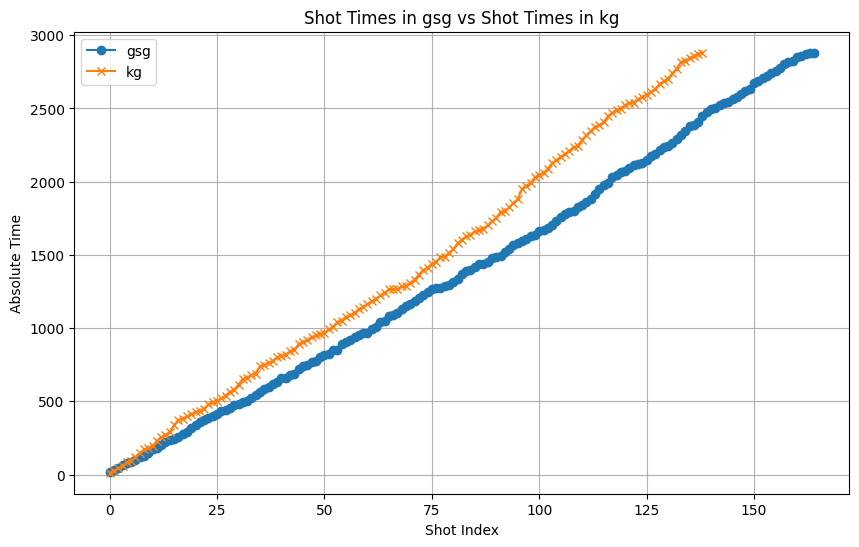

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(gsg['ABS_TIME'], label='gsg', marker='o')
plt.plot(kg['ABS_TIME'], label='kg', marker='x')

plt.xlabel('Shot Index')
plt.ylabel('Absolute Time')
plt.title('Shot Times in gsg vs Shot Times in kg')
plt.legend()
plt.grid(True)

plt.show()

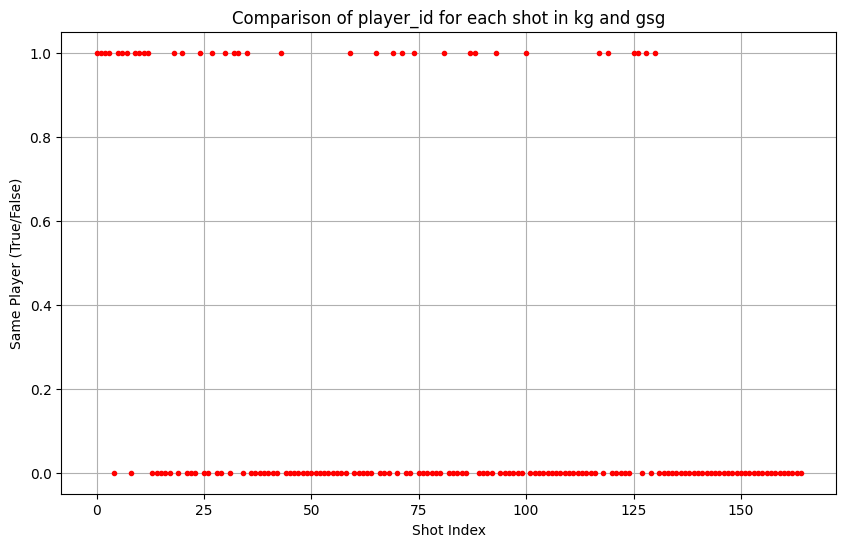

In [40]:
import matplotlib.pyplot as plt

# Compare player_id of each shot in order
# Ensure both dataframes have the same length by padding the shorter one with NaN
# Check if the player_id only shifts by one or two positions
shift_by_one = kg['player_id'].shift(1) == gsg['PLAYER_ID']
shift_by_two = kg['player_id'].shift(2) == gsg['PLAYER_ID']

# Combine the results
max_len = max(len(kg), len(gsg))
kg = kg.reindex(range(max_len))
gsg = gsg.reindex(range(max_len))
comparison = kg['player_id'].values == gsg['PLAYER_ID'].values

comparison_shift = comparison | shift_by_one | shift_by_two

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.plot(comparison_shift, marker='.', linestyle='None', color='r')
plt.xlabel('Shot Index')
plt.ylabel('Same Player (True/False)')
plt.title('Comparison of player_id for each shot in kg and gsg')
plt.grid(True)
plt.show()

In [92]:
kg

,GAME_ID,ABS_TIME,player_id
0,21400890,13.0,201961
1,21400890,28.0,201945
2,21400890,43.0,203135
3,21400890,61.0,2590
4,21400890,86.0,203077
...,...,...,...
134,21400890,2824.0,202391
135,21400890,2846.0,201945
136,21400890,2856.0,201941
137,21400890,2874.0,201941


In [93]:
gsg

,GAME_ID,ABS_TIME,PLAYER_ID
0,21400890,16.0,201961
1,21400890,31.0,201945
2,21400890,46.0,203135
3,21400890,64.0,2590
4,21400890,77.0,203903
...,...,...,...
160,21400890,2849.0,201945
161,21400890,2858.0,201941
162,21400890,2871.0,203903
163,21400890,2876.0,201941


In [94]:
kg.sort_values(by='ABS_TIME', inplace=True)

In [96]:
kg.player_id.astype(int)
gsg.PLAYER_ID.astype(int, copy=False)

0      201961
1      201945
2      203135
3        2590
4      203903
        ...  
160    201945
161    201941
162    203903
163    201941
164    202391
Name: PLAYER_ID, Length: 165, dtype: int64

In [103]:
kg.head(10)

,GAME_ID,ABS_TIME,player_id
0,21400890,13.0,201961
1,21400890,28.0,201945
2,21400890,43.0,203135
3,21400890,61.0,2590
4,21400890,86.0,203077
5,21400890,93.0,203135
6,21400890,119.0,203077
7,21400890,145.0,2744
8,21400890,172.0,2430
9,21400890,181.0,201961


In [104]:
gsg.head(10)

,GAME_ID,ABS_TIME,PLAYER_ID,gsg_abs_dup
0,21400890,16.0,201961,16.0
1,21400890,31.0,201945,31.0
2,21400890,46.0,203135,46.0
3,21400890,64.0,2590,64.0
4,21400890,77.0,203903,77.0
5,21400890,88.0,203077,88.0
6,21400890,99.0,203135,99.0
7,21400890,122.0,203077,122.0
8,21400890,130.0,203903,130.0
9,21400890,147.0,2744,147.0


In [114]:
merged.head(10)

,GAME_ID_kg,ABS_TIME,player_id,GAME_ID_gsg,PLAYER_ID,gsg_abs_dup
0,21400890,13.0,201961,21400890.0,201961.0,16.0
1,21400890,28.0,201945,21400890.0,201945.0,31.0
2,21400890,43.0,203135,21400890.0,203135.0,46.0
3,21400890,61.0,2590,21400890.0,2590.0,64.0
4,21400890,86.0,203077,21400890.0,203077.0,88.0
5,21400890,93.0,203135,NaN,NaN,NaN
6,21400890,119.0,203077,21400890.0,203077.0,122.0
7,21400890,145.0,2744,21400890.0,2744.0,147.0
8,21400890,172.0,2430,21400890.0,2430.0,174.0
9,21400890,181.0,201961,21400890.0,201961.0,184.0


In [115]:
merged[merged.GAME_ID_gsg.isna()]

,GAME_ID_kg,ABS_TIME,player_id,GAME_ID_gsg,PLAYER_ID,gsg_abs_dup
5,21400890,93.0,203135,NaN,NaN,NaN


In [43]:
# Concatenate the dataframes side by side
gsg = gsg.sort_values(by='ABS_TIME').reset_index(drop=True)
kg = kg.sort_values(by='ABS_TIME').reset_index(drop=True)
combined_df = pd.concat([gsg, kg], axis=1)

# Export to CSV
combined_df.to_csv(os.path.join(INT_DATA_DIR, 'combined_game_gen_sl_bnk_pbp_shots.csv'), index=False)

In [44]:
bnk_pbp = playbyplayv3.PlayByPlayV3(game_id='0021400890').get_data_frames()[0]
bnk_pbp['ABS_TIME'] = bnk_pbp.apply(lambda row: du.clock_to_absolute_seconds(row['clock'], row['period']), axis=1)

In [45]:
bnk_pbp_shots = bnk_pbp[bnk_pbp.actionType.str.contains('shot', case=False)].reset_index(drop=True)


In [46]:
bnk_pbp_shots

,gameId,actionNumber,clock,period,teamId,teamTricode,personId,playerName,playerNameI,xLegacy,...,scoreAway,pointsTotal,location,description,actionType,subType,videoAvailable,shotValue,actionId,ABS_TIME
0,0021400890,2,PT11M44.00S,1,1610612747,LAL,201961,Ellington,W. Ellington,234,...,3,3,v,Ellington 24' 3PT Jump Shot (3 PTS) (Kelly 1 AST),Made Shot,Jump Shot,1,0,3,16.0
1,0021400890,3,PT11M29.00S,1,1610612766,CHA,201945,Henderson,G. Henderson,125,...,,0,h,MISS Henderson 18' Jump Shot,Missed Shot,Jump Shot,1,0,4,31.0
2,0021400890,5,PT11M14.00S,1,1610612747,LAL,203135,Sacre,R. Sacre,34,...,5,5,v,Sacre 17' Jump Shot (2 PTS) (Kelly 2 AST),Made Shot,Jump Shot,1,0,6,46.0
3,0021400890,6,PT10M56.00S,1,1610612766,CHA,2590,Williams,M. Williams,-163,...,,0,h,MISS Mo. Williams 20' Jump Shot,Missed Shot,Jump Shot,1,0,7,64.0
4,0021400890,8,PT10M43.00S,1,1610612747,LAL,203903,Clarkson,J. Clarkson,193,...,,0,v,MISS Clarkson 26' 3PT Jump Shot,Missed Shot,Jump Shot,1,0,9,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0021400890,476,PT00M31.90S,4,1610612766,CHA,201945,Henderson,G. Henderson,-142,...,,0,h,MISS Henderson 17' Jump Shot,Missed Shot,Jump Shot,1,0,428,2848.1
161,0021400890,478,PT00M22.80S,4,1610612747,LAL,201941,Hill,J. Hill,56,...,,0,v,MISS Hill 19' Jump Shot,Missed Shot,Jump Shot,1,0,430,2857.2
162,0021400890,510,PT00M09.00S,4,1610612747,LAL,203903,Clarkson,J. Clarkson,-2,...,98,199,v,Clarkson 1' Driving Layup (19 PTS) (Hill 2 AST),Made Shot,Driving Layup Shot,1,0,451,2871.0
163,0021400890,525,PT00M04.80S,4,1610612747,LAL,201941,Hill,J. Hill,7,...,100,203,v,Hill 1' Layup (10 PTS) (Johnson 3 AST),Made Shot,Layup Shot,1,0,460,2875.2


In [69]:
gen_sl_abs_times = set(game_gen_sl['ABS_TIME'].unique())
pbp_times = set(bnk_pbp_shots['ABS_TIME'].unique())

common_game_ids = gen_sl_abs_times.intersection(pbp_times)

print(f"Number of unique in gen_sl: {len(gen_sl_abs_times)}")
print(f"Number of unique in pbp: {len(pbp_times)}")
print(f"Number of common in both: {len(common_game_ids)}")

Number of unique in gen_sl: 100
Number of unique in pbp: 165
Number of common in both: 93


In [ ]:
base_and_kag = pd.merge(gen_sl, kaggle_for_join, on=['GAME_ID', 'ABS_TIME'], suffixes=('_gen', '_kag'),)
base_and_kag.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,MINS_LEFT,SECS_LEFT,ABS_TIME,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,player_id
0,2015,2014-15,1610612760,Oklahoma City Thunder,201566,Russell Westbrook,G,PG,03-04-2015,21400904,...,1,55,3485.0,20.2,5,4.9,"Noel, Nerlens",203457,0.0,201566
1,2015,2014-15,1610612757,Portland Trail Blazers,200746,LaMarcus Aldridge,F,PF,03-04-2015,21400908,...,0,59,3541.0,12.9,0,0.4,"Jordan, DeAndre",201599,1.9,200746
2,2015,2014-15,1610612747,Los Angeles Lakers,201941,Jordan Hill,C,C,03-04-2015,21400905,...,0,0,2880.0,NaN,0,0.9,"Walker, Henry",201611,16.4,201941
3,2015,2014-15,1610612738,Boston Celtics,203092,Tyler Zeller,C,C,03-04-2015,21400898,...,0,0,2880.0,NaN,0,1.4,"Hood, Rodney",203918,1.7,203092
4,2015,2014-15,1610612751,Brooklyn Nets,202721,Darius Morris,G,PG,03-04-2015,21400899,...,2,5,2755.0,24.0,0,1.5,"Vonleh, Noah",203943,2.5,202366


In [39]:
gen_sl.shape, kaggle_for_join.shape, base_and_kag.shape

((205550, 27), (128069, 9), (5571, 34))

In [35]:
gen_sl.groupby('ABS_TIME').size().sort_values(ascending=False)

ABS_TIME
720.0     756
1440.0    754
2160.0    751
2159.0    326
719.0     325
         ... 
4173.0      1
4176.0      1
4178.0      1
4179.0      1
5038.0      1
Length: 3386, dtype: int64

In [45]:
ap_1415_index = playerindex.PlayerIndex(season='2014-15').get_data_frames()[0]

In [ ]:
ap_1415_index_for_join = ap_1415_index[['PERSON_ID', 'HEIGHT']]

In [56]:
test = playbyplayv3.PlayByPlayV3(game_id='0021401229').get_data_frames()[0]

In [134]:
test['ABS_TIME'] = test.apply(lambda row: du.clock_to_absolute_seconds(row['clock'], row['period']), axis=1)

In [149]:
shot_logs_1415.head() # kaggle shot logs

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,ABS_TIME
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148,651.0
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148,706.0
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148,720.0
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148,733.0
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148,806.0
